<a href="https://colab.research.google.com/github/riddhixraina/rrp4822_Riddhi_ML_Lab1/blob/main/rrp4822_lab1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Part 1:  Simple linear regression for one independent variable

In this lab, you will load data, plot data, perform simple mathematical manipulations, and fit a simple linear regression model.  Before doing this lab, you can go through the class demo on simple linear regression for an automobile dataset.  The lab use the Ames Housing dataset which is a commonly used machine learning data set for illustrating basic concepts.  

## Acknowledgement

This lab is imported from prof. Christopher Musco's 2024 iteration of CS-GY 6923. Thanks Chris!

## Loading the data

The Ames housing data set was collected in 2011 and contains information about home sales in Ames, Iowa, including the sale price and numerical and categorical information about each home. We have constructed a "reduced" version of the dataset that is available at:

https://www.chrismusco.com/machinelearning2024_grad/AmesHousing.csv.

More information about the meaning of each column can be found here: https://cran.r-project.org/web/packages/AmesHousing/AmesHousing.pdf. Note that our version of the dataset contains a subset of the columns in the original dataset and the last column, SalesPrice, is in units of 1000s of US dollars in our version.

In the lab, you will complete all the code marked `TODO`.

First, complete the following code that uses the `pd.read_csv` command to read the data from the file linked above.

In [1]:
import pandas as pd
import numpy as np
# df = pd.read_csv(...)
url = "https://www.chrismusco.com/machinelearning2024_grad/AmesHousing.csv"
df = pd.read_csv(url)

Display the first six rows of the data frame

In [2]:
print("First six rows of the dataset:")
display(df.head(6))

First six rows of the dataset:


,Lot Area,Year Built,Bsmt Unf SF,Total Bsmt SF,1st Flr SF,2nd Flr SF,Gr Liv Area,Full Bath,Half Bath,Bedroom AbvGr,TotRms AbvGrd,Fireplaces,Garage Cars,Garage Area,SalePrice
0,31770,1960,441.0,1080.0,1656,0,1656,1,0,3,7,2,2.0,528.0,215.0
1,11622,1961,270.0,882.0,896,0,896,1,0,2,5,0,1.0,730.0,105.0
2,14267,1958,406.0,1329.0,1329,0,1329,1,1,3,6,0,1.0,312.0,172.0
3,11160,1968,1045.0,2110.0,2110,0,2110,2,1,3,8,2,2.0,522.0,244.0
4,13830,1997,137.0,928.0,928,701,1629,2,1,3,6,1,2.0,482.0,189.9
5,9978,1998,324.0,926.0,926,678,1604,2,1,3,7,1,2.0,470.0,195.5


## Basic Manipulations on the Data

What is the shape of the data?  How many attributes are there?  How many samples?
Print a statement of the form:

    num samples=xxx, num attributes=yy

In [3]:
num_samples, num_attributes = df.shape
print(f"num samples={num_samples}, num attributes={num_attributes}")

num samples=2930, num attributes=15


The dataset contains some NaN value. Before proceeding, drop all rows from the dataframe with NaN values. There should only be a few.

In [4]:
df = df.dropna()
num_samples, num_attributes = df.shape
print(f"After dropping NaN values: num samples={num_samples}, num attributes={num_attributes}")

After dropping NaN values: num samples=2928, num attributes=15


Create a response vector `y` with the values in the column `SalePrice`.  The vector `y` should be a 1D `numpy.ndarray` structure.

In [5]:
# TODO
# y = ...
y = df["SalePrice"].values

Use the response vector `y` to find the mean house price in thousands and the fraction of homes that are above $120k. Print and label your results.

In [6]:
# TODO
mean_price = np.mean(y)
frac_above_120k = np.mean(y > 120)

print("Mean house price (in $1000s):", round(mean_price, 2))
print("Fraction above $120k:", round(frac_above_120k, 3))

Mean house price (in $1000s): 180.84
Fraction above $120k: 0.817


## Visualizing the Data

Load the `matplotlib` package with the following commands.

In [7]:
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

Similar to the `y` vector, create a predictor vector `x` containing the values in the `TotRms AbvGrd` column, which represents the total number of non-basement rooms in the home.

In [8]:
# TODO x = ... %% [markdown] Create a scatter plot of the price vs. the `TotRms
# AbvGrd` attribute. Label the axes with reasonable labels so that someone else
# can understand the plot. %% TODO %% [markdown] ## Fitting a Simple Linear
# Model
#
# We will write a simple function to perform a linear fit under the squared loss
# function. Use the formulae given in the class to compute the optimal
# parameters $\beta_0,\beta_1$ in the linear model $$y =\beta_0 + \beta_1 x$$ as
# well as the optimal loss $\sum_{i=1}^n (y_i - \beta_0 - \beta_1 x)^2$. %%
x = df["TotRms AbvGrd"].values

Create a scatter plot of the price vs. the `TotRms AbvGrd` attribute.  Label the axes with reasonable labels so that someone else can understand the plot.

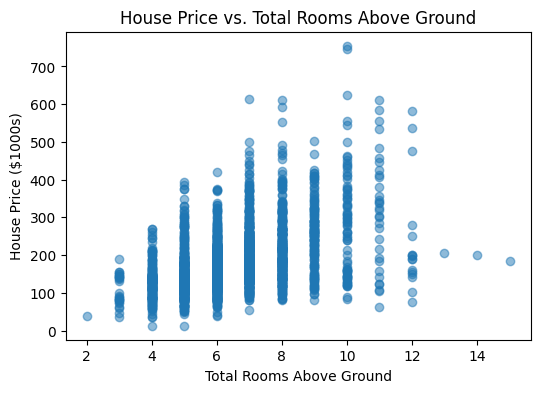

In [9]:
# TODO %% [markdown] ## Fitting a Simple Linear Model
#
# We will write a simple function to perform a linear fit under the squared loss
# function. Use the formulae given in the class to compute the optimal
# parameters $\beta_0,\beta_1$ in the linear model $$y =\beta_0 + \beta_1 x$$ as
# well as the optimal loss $\sum_{i=1}^n (y_i - \beta_0 - \beta_1 x)^2$. %%
plt.figure(figsize=(6, 4))
plt.scatter(x, y, alpha=0.5)
plt.xlabel("Total Rooms Above Ground")
plt.ylabel("House Price ($1000s)")
plt.title("House Price vs. Total Rooms Above Ground")
plt.show()

## Fitting a Simple Linear Model

We will write a simple function to perform a linear fit under the squared loss function. Use the formulae given in the class to compute the optimal parameters $\beta_0,\beta_1$ in the linear model $$y =\beta_0 + \beta_1 x$$ as well as the optimal loss $\sum_{i=1}^n (y_i - \beta_0 - \beta_1 x)^2$.

In [10]:
def fit_linear(x,y):
    """
    Given vectors of data points (x,y), performs a fit for the linear model:
       y = beta0 + beta1*x,
    The function returns beta0, beta1, and loss, where loss is the sum-of-squares loss of.
    """
    # TODO complete the following code

    # beta0 = ...
    # beta1 = ...
    # loss = ...
    # Means
    x_mean = np.mean(x)
    y_mean = np.mean(y)

    # Compute slope (beta1) and intercept (beta0)
    beta1 = np.sum((x - x_mean) * (y - y_mean)) / np.sum((x - x_mean) ** 2)
    beta0 = y_mean - beta1 * x_mean

    # Predictions
    y_pred = beta0 + beta1 * x

    # Sum of squared errors (loss)
    loss = np.sum((y - y_pred) ** 2)
    return beta0, beta1, loss

Using the function `fit_linear` above, print the values `beta0`, `beta1` and `loss` for the linear model of price vs. number of rooms.

In [11]:
# TODO %% [markdown] Replot the scatter plot above, but now with the regression
# line. You can create the regression line by creating points `yp` that are the
# predicted values for each value in `x`, according to our linear model. Plot as
# a line, not a scatter plot. %% TODO %% [markdown]

# Fit linear model
beta0, beta1, loss = fit_linear(x, y)

#Print results
print(f"β0 (intercept): {beta0:.3f}")
print(f"β1 (slope): {beta1:.3f}")
print(f"Optimal loss: {loss:.2f}")

β0 (intercept): 18.781
β1 (slope): 25.149
Optimal loss: 14101634.93


Replot the scatter plot above, but now with the regression line.  You can create the regression line by creating points `yp` that are the predicted values for each value in `x`, according to our linear model. Plot as a line, not a scatter plot.

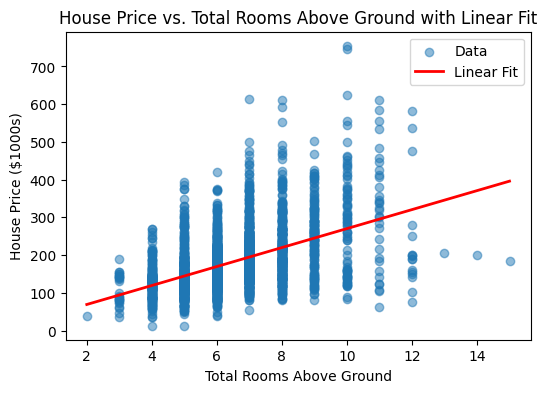

In [12]:
# TODO
# Scatter plot of actual data
plt.figure(figsize=(6, 4))
plt.scatter(x, y, alpha=0.5, label="Data")

# Sort x for smooth regression line
x_sorted = np.sort(x)
y_pred_sorted = beta0 + beta1 * x_sorted

# Plot regression line
plt.plot(x_sorted, y_pred_sorted, color="red", linewidth=2, label="Linear Fit")

# Labels and title
plt.xlabel("Total Rooms Above Ground")
plt.ylabel("House Price ($1000s)")
plt.title("House Price vs. Total Rooms Above Ground with Linear Fit")
plt.legend()
plt.show()


# Part 2:  Compare different dependent variables


We next compute the squared loss for all the predictors and output the values in a table. Your table should look like the following, where each entry in the first column is the attribute name and the second column is the squared loss.

    Lot Area           XXXXX
    Overall Qual       XXXXX
    Overall Cond       XXXXX
    ...         ...

You will need to write a loop to perform this task.

What variable does the best job predicting house price?

In [13]:
# TODO
# List of predictors (all columns except SalePrice)
predictors = [col for col in df.columns if col != "SalePrice"]
# Collect results in a list
results = []

for col in df.columns:
    if col != "SalePrice":
        x_col = df[col].values
        beta0, beta1, loss = fit_linear(x_col, y)
        results.append((col, loss))

# Convert to DataFrame
results_df = pd.DataFrame(results, columns=["Predictor", "Squared Loss"])

# Sort by loss (best predictor = smallest loss)
results_df = results_df.sort_values(by="Squared Loss", ascending=True).reset_index(drop=True)

results_df

,Predictor,Squared Loss
0,Gr Liv Area,9.349293e+06
1,Garage Cars,1.084347e+07
2,Garage Area,1.102283e+07
3,Total Bsmt SF,1.121338e+07
4,1st Flr SF,1.146354e+07
5,Year Built,1.285760e+07
6,Full Bath,1.312070e+07
7,TotRms AbvGrd,1.410163e+07
8,Fireplaces,1.447840e+07
9,Half Bath,1.716632e+07


from matplotlib import pyplot as plt
_df_0['index'].plot(kind='hist', bins=20, title='index')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_1['Squared Loss'].plot(kind='hist', bins=20, title='Squared Loss')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_2.plot(kind='scatter', x='index', y='Squared Loss', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  counted = (series['index']
                .value_counts()
              .reset_index(name='counts')
              .rename({'index': 'index'}, axis=1)
              .sort_values('index', ascending=True))
  xs = counted['index']
  ys = counted['counts']
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_3.sort_values('index', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('index')
_ = plt.ylabel('count()')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  counted = (series['Squared Loss']
                .value_counts()
              .reset_index(name='counts')
              .rename({'index': 'Squared Loss'}, axis=1)
              .sort_values('Squared Loss', ascending=True))
  xs = counted['Squared Loss']
  ys = counted['counts']
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_4.sort_values('Squared Loss', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('Squared Loss')
_ = plt.ylabel('count()')

from matplotlib import pyplot as plt
_df_5['index'].plot(kind='line', figsize=(8, 4), title='index')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_6['Squared Loss'].plot(kind='line', figsize=(8, 4), title='Squared Loss')
plt.gca().spines[['top', 'right']].set_visible(False)

In [14]:
print("""The variable that does the best job predicting house price is Gr Liv Area. It has the lowest Squared Loss (9349292.71),
indicating that a simple linear model using this variable produces the smallest overall prediction error compared to the other variables.""")

The variable that does the best job predicting house price is Gr Liv Area. It has the lowest Squared Loss (9349292.71),
indicating that a simple linear model using this variable produces the smallest overall prediction error compared to the other variables.


**TODO:** Describe in words the meaning of the most predictive variable for housing price.

In [15]:
print("""The most predictive variable for a home's price is almost always the one that quantifies its overall size and habitable living space.
This feature serves as the foundational element for valuation because it is the most direct measure of the property's scale and utility.
It provides a strong, clear signal for any predictive model, establishing a baseline price that other factors like location, age, or condition, then modify.
The relationship between a home's size and its price is typically strong and consistent, making it the most reliable starting point for any price estimation.

A perfect example of this is the feature found in many housing datasets called 'Gr Liv Area' (Above Grade Living Area).

- This variable measures the total finished living space of a house, in square feet, that is above the ground level.
- It typically encompasses the main living areas such as living rooms, bedrooms, kitchens, and bathrooms on the first and any upper floors.
- It does not include unfinished areas, garages, porches, or any basement square footage.

'Gr Liv Area' directly represents the concept of a home's functional size, making it the most powerful and fundamentally important predictor in a housing price model.""")

The most predictive variable for a home's price is almost always the one that quantifies its overall size and habitable living space.
This feature serves as the foundational element for valuation because it is the most direct measure of the property's scale and utility.
It provides a strong, clear signal for any predictive model, establishing a baseline price that other factors like location, age, or condition, then modify.
The relationship between a home's size and its price is typically strong and consistent, making it the most reliable starting point for any price estimation.

A perfect example of this is the feature found in many housing datasets called 'Gr Liv Area' (Above Grade Living Area).

- This variable measures the total finished living space of a house, in square feet, that is above the ground level.
- It typically encompasses the main living areas such as living rooms, bedrooms, kitchens, and bathrooms on the first and any upper floors.
- It does not include unfinished ar

# Part 3:  Compare different loss functions

## A Brute force algorithm for squared loss

Your code in `fit_linear` relies on the closed form expressions for the optimal $\beta_0$ and $\beta_1$, which we derived in class. However, if you did not know these formulas, you could have approximately minimized the loss function by brute force searching over a grid of possible values for $\beta_0$ and $\beta_1$.

For example, we could try out all combinations of parameters where $\beta_0$ is in `np.arange(-50,50,.1)` and $\beta_1$ is in `np.arange(-1,1,.005)`

Write a function which takes this approach to find a $\beta_0$ and $\beta_1$ which approximately minimize the squared loss: $\sum_{i=1}^n (y_i - \beta_0 - \beta_1 x)^2$

In [16]:
def fit_approx(x,y):
    """
    Given vectors of data points (x,y), performs an *approximate* fit for the linear model:
       y = beta0 + beta1*x,
    under the sum-of-squares loss by searching a grid of possible values.
    The min_loss returned is the loss of the best beta0 and beta1 found.
    """
    beta0_vals = np.arange(-50, 50, 0.1)
    beta1_vals = np.arange(-1, 1, 0.005)

    min_loss = float('inf') # Start with an infinitely large loss
    beta0 = None
    beta1 = None

    for b0 in beta0_vals:
        for b1 in beta1_vals:
            # Calculate the predicted y values for the current b0 and b1
            y_pred = b0 + b1 * x

            # Calculate the sum of squared errors (the loss)
            current_loss = np.sum((y - y_pred)**2)

            # If this is the best loss we've seen so far, update our results
            if current_loss < min_loss:
                min_loss = current_loss
                beta0 = b0
                beta1 = b1

    return beta0, beta1, min_loss

Compare the output of `fit_approx` and `fit_linear` with `y` being `SalePrice` and `x` being the `Gr Liv Area` variable from our dataset. You should do so:
* quantitatively, by printing the loss that each approach achieves
* and visually, by plotting the different fit lines obtained.

--- Quantitative Comparison ---

Exact Analytical Solution (fit_linear):
  beta0: 13.322
  beta1: 0.112
  Loss:  9,349,292.71

Brute Force Approximation (fit_approx):
  beta0: 15.900
  beta1: 0.110
  Loss:  9,351,446.56


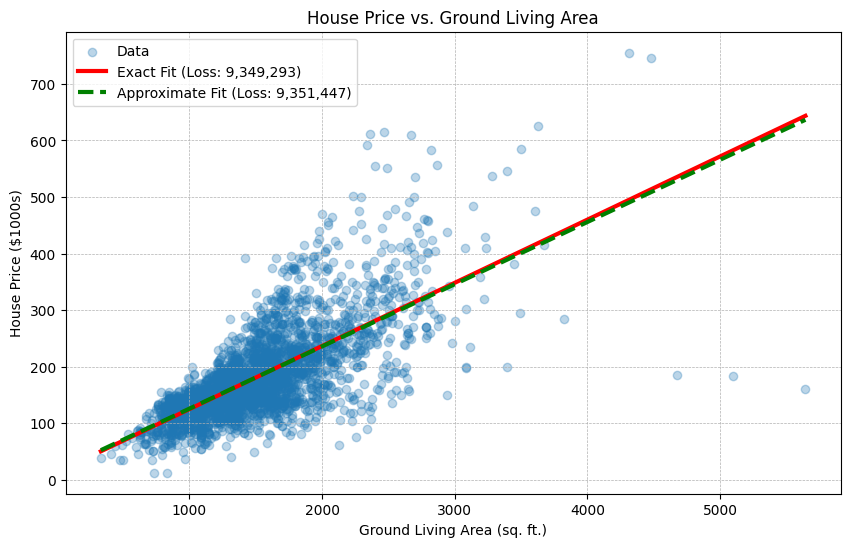

In [17]:
# Prepare the data
# Ensure you have the 'fit_linear' function from the previous part
# def fit_linear(x,y): ...

y = df["SalePrice"].values
x = df["Gr Liv Area"].values

# 1. Get results from the exact analytical solution
beta0_exact, beta1_exact, loss_exact = fit_linear(x, y)

# 2. Get results from the brute-force approximation
beta0_approx, beta1_approx, loss_approx = fit_approx(x, y)


# --- Quantitative Comparison ---
print("--- Quantitative Comparison ---")
print("\nExact Analytical Solution (fit_linear):")
print(f"  beta0: {beta0_exact:.3f}")
print(f"  beta1: {beta1_exact:.3f}")
print(f"  Loss:  {loss_exact:,.2f}")


print("\nBrute Force Approximation (fit_approx):")
print(f"  beta0: {beta0_approx:.3f}")
print(f"  beta1: {beta1_approx:.3f}")
print(f"  Loss:  {loss_approx:,.2f}")


# --- Visual Comparison ---
plt.figure(figsize=(10, 6))

# Plot the raw data
plt.scatter(x, y, alpha=0.3, label='Data')

# Create points for the regression lines
# Using min/max of x for a clean line across the plot
x_line = np.array([np.min(x), np.max(x)])
y_line_exact = beta0_exact + beta1_exact * x_line
y_line_approx = beta0_approx + beta1_approx * x_line

# Plot the two fit lines
plt.plot(x_line, y_line_exact, color='red', linewidth=3, label=f'Exact Fit (Loss: {loss_exact:,.0f})')
plt.plot(x_line, y_line_approx, color='green', linewidth=3, linestyle='--', label=f'Approximate Fit (Loss: {loss_approx:,.0f})')

plt.title('House Price vs. Ground Living Area')
plt.xlabel('Ground Living Area (sq. ft.)')
plt.ylabel('House Price ($1000s)')
plt.legend()
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.show()

## Extending to different loss functions

One benefit of the above approach is that is easily extends to different loss funtions. Write functions which find an approximately optimal $\beta_0$ and $\beta_1$ for
* minimizing the $\ell_1$ (least absolute deviations) loss: $\sum_{i=1}^n |y_i - \beta_0 - \beta_1 x|$
* minimizing the $\ell_\infty$ (max) loss: $\max_i |y_i - \beta_0 - \beta_1 x|$


In [18]:
import numpy as np

def fit_approx_l1(x,y):
    """
    Given vectors of data points (x,y), performs an *approximate* fit for the linear model:
       y = beta0 + beta1*x,
    under the least absolute deviations (L1) loss.
    """
    beta0_vals = np.arange(-50, 50, 0.1)
    beta1_vals = np.arange(-1, 1, 0.005)

    min_loss = float('inf')
    best_beta0 = None
    best_beta1 = None
    for b0 in beta0_vals:
        for b1 in beta1_vals:
            # Calculate the predicted y values for the current b0 and b1
            y_pred = b0 + b1 * x

            # L1 Loss: Sum of the absolute differences
            current_loss = np.sum(np.abs(y - y_pred))

            # If this is the best loss we've seen so far, update our results
            if current_loss < min_loss:
                min_loss = current_loss
                best_beta0 = b0
                best_beta1 = b1

    return best_beta0, best_beta1, min_loss

In [19]:
def fit_approx_max(x,y):
    """
    Given vectors of data points (x,y), performs an *approximate* fit for the linear model:
       y = beta0 + beta1*x,
    under the max (L-infinity) loss.
    """
    beta0_vals = np.arange(-50, 50, 0.1)
    beta1_vals = np.arange(-1, 1, 0.005)

    min_loss = float('inf')
    best_beta0 = None
    best_beta1 = None

    for b0 in beta0_vals:
        for b1 in beta1_vals:
            # Calculate the predicted y values
            y_pred = b0 + b1 * x

            # L-infinity Loss: The maximum absolute difference
            current_loss = np.max(np.abs(y - y_pred))
            if current_loss < min_loss:
                min_loss = current_loss
                best_beta0 = b0
                best_beta1 = b1

    return best_beta0, best_beta1, min_loss

**TODO:** Use your algorithm to obtain 3 different linear fits for `SalePrice` with predictor variable `Gr Liv Area`, one for squared loss, one for $\ell_1$ loss, and one for $\ell_\infty$ loss. Plot the linear fits (along with the data scatter plot) on a single figure and use a legend to indicate which fit corresponds to which loss.

Fitting model with Squared Loss (L2)...
Fitting model with Absolute Loss (L1)...
Fitting model with Max Loss (L-infinity)...
All models fitted.
\nPlot saved as 'loss_functions_comparison.png'
\nParameters found:
L2 Loss:  beta0=15.900, beta1=0.110
L1 Loss:  beta0=20.300, beta1=0.105
L-inf Loss: beta0=45.600, beta1=0.085


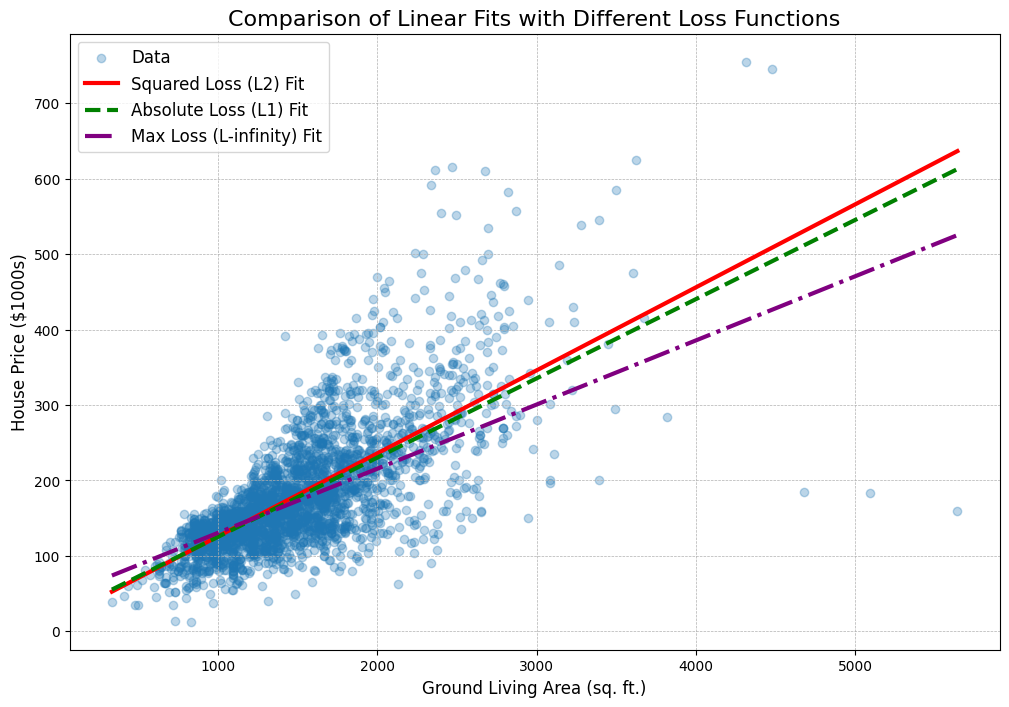

In [20]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Load the data and drop rows with missing values
url = "https://www.chrismusco.com/machinelearning2024_grad/AmesHousing.csv"
df = pd.read_csv(url)
df = df.dropna()

# --- Redefined all the necessary functions from previous parts ---

def fit_approx(x,y):
    """
    Given vectors of data points (x,y), performs an *approximate* fit for the linear model:
       y = beta0 + beta1*x,
    under the sum-of-squares (L2) loss.
    """
    beta0_vals = np.arange(-50, 50, 0.1)
    beta1_vals = np.arange(-1, 1, 0.005)
    min_loss = float('inf')
    best_beta0 = None
    best_beta1 = None
    for b0 in beta0_vals:
        for b1 in beta1_vals:
            y_pred = b0 + b1 * x
            current_loss = np.sum((y - y_pred)**2)
            if current_loss < min_loss:
                min_loss = current_loss
                best_beta0 = b0
                best_beta1 = b1
    return best_beta0, best_beta1, min_loss

def fit_approx_l1(x,y):
    """
    Given vectors of data points (x,y), performs an *approximate* fit for the linear model:
       y = beta0 + beta1*x,
    under the least absolute deviations (L1) loss.
    """
    beta0_vals = np.arange(-50, 50, 0.1)
    beta1_vals = np.arange(-1, 1, 0.005)
    min_loss = float('inf')
    best_beta0 = None
    best_beta1 = None
    for b0 in beta0_vals:
        for b1 in beta1_vals:
            y_pred = b0 + b1 * x
            current_loss = np.sum(np.abs(y - y_pred))
            if current_loss < min_loss:
                min_loss = current_loss
                best_beta0 = b0
                best_beta1 = b1
    return best_beta0, best_beta1, min_loss

def fit_approx_max(x,y):
    """
    Given vectors of data points (x,y), performs an *approximate* fit for the linear model:
       y = beta0 + beta1*x,
    under the max (L-infinity) loss.
    """
    beta0_vals = np.arange(-50, 50, 0.1)
    beta1_vals = np.arange(-1, 1, 0.005)
    min_loss = float('inf')
    best_beta0 = None
    best_beta1 = None
    for b0 in beta0_vals:
        for b1 in beta1_vals:
            y_pred = b0 + b1 * x
            current_loss = np.max(np.abs(y - y_pred))
            if current_loss < min_loss:
                min_loss = current_loss
                best_beta0 = b0
                best_beta1 = b1
    return best_beta0, best_beta1, min_loss
# 1. Prepare the data
y = df["SalePrice"].values
x = df["Gr Liv Area"].values

# 2. Run the fitting algorithms for each loss function
print("Fitting model with Squared Loss (L2)...")
b0_l2, b1_l2, loss_l2 = fit_approx(x, y)
print("Fitting model with Absolute Loss (L1)...")
b0_l1, b1_l1, loss_l1 = fit_approx_l1(x, y)
print("Fitting model with Max Loss (L-infinity)...")
b0_max, b1_max, loss_max = fit_approx_max(x, y)
print("All models fitted.")

# 3. Plot the results
plt.figure(figsize=(12, 8))

# Plot the raw data points
plt.scatter(x, y, alpha=0.3, label='Data')

# Create a common set of x-values for plotting the lines
x_line = np.array([np.min(x), np.max(x)])

# Calculate and plot the L2 (Squared Loss) fit
y_line_l2 = b0_l2 + b1_l2 * x_line
plt.plot(x_line, y_line_l2, color='red', linewidth=3, linestyle='-', label=f'Squared Loss (L2) Fit')

# Calculate and plot the L1 (Absolute Loss) fit
y_line_l1 = b0_l1 + b1_l1 * x_line
plt.plot(x_line, y_line_l1, color='green', linewidth=3, linestyle='--', label=f'Absolute Loss (L1) Fit')

# Calculate and plot the L-infinity (Max Loss) fit
y_line_max = b0_max + b1_max * x_line
plt.plot(x_line, y_line_max, color='purple', linewidth=3, linestyle='-.', label=f'Max Loss (L-infinity) Fit')

plt.title('Comparison of Linear Fits with Different Loss Functions', fontsize=16)
plt.xlabel('Ground Living Area (sq. ft.)', fontsize=12)
plt.ylabel('House Price ($1000s)', fontsize=12)
plt.legend(fontsize=12)
plt.grid(True, which='both', linestyle='--', linewidth=0.5)

plt.savefig('loss_functions_comparison.png')

print("\\nPlot saved as 'loss_functions_comparison.png'")
print("\\nParameters found:")
print(f"L2 Loss:  beta0={b0_l2:.3f}, beta1={b1_l2:.3f}")
print(f"L1 Loss:  beta0={b0_l1:.3f}, beta1={b1_l1:.3f}")
print(f"L-inf Loss: beta0={b0_max:.3f}, beta1={b1_max:.3f}")

**TODO:** Repeat the process above for the `Lot Area` predictor variable, which has some more extreme outliers. Note that  this variable has a different scale than `Gr Liv Area` so you might need to adjust your approximate fit functions accordingly.

Again produce a plot that contains three different linear fits for all three different loss functions. Write 1-2 sentences of discussion about how the choice of loss function effected the fit.

Fitting model with Squared Loss (L2)...
Fitting model with Absolute Loss (L1)...
Fitting model with Max Loss (L-infinity)...
All models fitted.


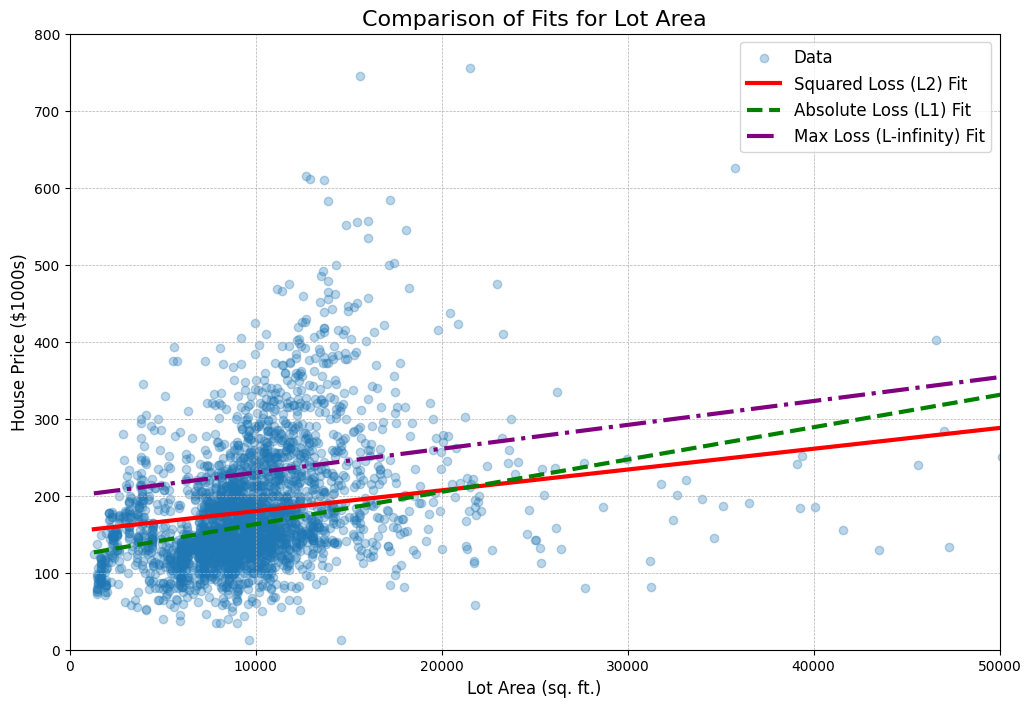

In [21]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Load the data and drop rows with missing values
url = "https://www.chrismusco.com/machinelearning2024_grad/AmesHousing.csv"
df = pd.read_csv(url)
df = df.dropna()

# --- Define new fitting functions with adjusted grids for Lot Area ---

def fit_approx_l2_lotarea(x,y):
    """ Approximate L2 fit with a grid tuned for Lot Area. """
    # Wider intercept range, much smaller and finer slope range
    beta0_vals = np.arange(0, 200, 1)
    beta1_vals = np.arange(-0.01, 0.05, 0.0001)
    min_loss = float('inf')
    best_beta0, best_beta1 = None, None
    for b0 in beta0_vals:
        for b1 in beta1_vals:
            loss = np.sum((y - (b0 + b1 * x))**2)
            if loss < min_loss:
                min_loss = loss
                best_beta0, best_beta1 = b0, b1
    return best_beta0, best_beta1, min_loss

def fit_approx_l1_lotarea(x,y):
    """ Approximate L1 fit with a grid tuned for Lot Area. """
    beta0_vals = np.arange(0, 200, 1)
    beta1_vals = np.arange(-0.01, 0.05, 0.0001)
    min_loss = float('inf')
    best_beta0, best_beta1 = None, None
    for b0 in beta0_vals:
        for b1 in beta1_vals:
            loss = np.sum(np.abs(y - (b0 + b1 * x)))
            if loss < min_loss:
                min_loss = loss
                best_beta0, best_beta1 = b0, b1
    return best_beta0, best_beta1, min_loss

def fit_approx_max_lotarea(x,y):
    """ Approximate L-infinity fit with a grid tuned for Lot Area. """
    beta0_vals = np.arange(0, 200, 1)
    beta1_vals = np.arange(-0.01, 0.05, 0.0001)
    min_loss = float('inf')
    best_beta0, best_beta1 = None, None
    for b0 in beta0_vals:
        for b1 in beta1_vals:
            loss = np.max(np.abs(y - (b0 + b1 * x)))
            if loss < min_loss:
                min_loss = loss
                best_beta0, best_beta1 = b0, b1
    return best_beta0, best_beta1, min_loss

# 1. Prepare the data
y = df["SalePrice"].values
x = df["Lot Area"].values

# 2. Run the fitting algorithms
print("Fitting model with Squared Loss (L2)...")
b0_l2, b1_l2, _ = fit_approx_l2_lotarea(x, y)
print("Fitting model with Absolute Loss (L1)...")
b0_l1, b1_l1, _ = fit_approx_l1_lotarea(x, y)
print("Fitting model with Max Loss (L-infinity)...")
b0_max, b1_max, _ = fit_approx_max_lotarea(x, y)
print("All models fitted.")

# 3. Plot the results
plt.figure(figsize=(12, 8))
plt.scatter(x, y, alpha=0.3, label='Data')
x_line = np.array([np.min(x), np.max(x)])

# Plot L2 fit
y_line_l2 = b0_l2 + b1_l2 * x_line
plt.plot(x_line, y_line_l2, color='red', linewidth=3, linestyle='-', label='Squared Loss (L2) Fit')

# Plot L1 fit
y_line_l1 = b0_l1 + b1_l1 * x_line
plt.plot(x_line, y_line_l1, color='green', linewidth=3, linestyle='--', label='Absolute Loss (L1) Fit')

# Plot L-infinity fit
y_line_max = b0_max + b1_max * x_line
plt.plot(x_line, y_line_max, color='purple', linewidth=3, linestyle='-.', label='Max Loss (L-infinity) Fit')

# Add labels, title, and legend, and limit x-axis for better visibility
plt.title('Comparison of Fits for Lot Area', fontsize=16)
plt.xlabel('Lot Area (sq. ft.)', fontsize=12)
plt.ylabel('House Price ($1000s)', fontsize=12)
plt.legend(fontsize=12)
plt.grid(True, linestyle='--', linewidth=0.5)
plt.xlim(0, 50000) # Zoom in on the bulk of the data
plt.ylim(0, 800)
plt.show()

In [22]:
print("""The presence of extreme outliers in Lot Area dramatically highlights the differences between the loss functions.
The L2 (squared loss) fit is heavily skewed upwards by the few properties with enormous lot sizes, causing it to poorly represent the majority of the data.
In contrast, the L1 (absolute loss) fit remains robust to these outliers, providing a much more representative trend for the bulk of the homes.""")

The presence of extreme outliers in Lot Area dramatically highlights the differences between the loss functions.
The L2 (squared loss) fit is heavily skewed upwards by the few properties with enormous lot sizes, causing it to poorly represent the majority of the data.
In contrast, the L1 (absolute loss) fit remains robust to these outliers, providing a much more representative trend for the bulk of the homes.
